# 0.Loading data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.path.abspath('.') 
sample = xr.open_dataset(path + '/test.nc')

In [26]:
from utils.dc_display_map import display_map
lon = (float(sample.longitude.min().values), float(sample.longitude.max().values))
lat = (float(sample.latitude.min().values), float(sample.latitude.max().values))
display_map(latitude = lat, longitude = lon)

# 1.Clip xarray with geopandas

In [4]:
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd

In [5]:
path = os.path.abspath('.') 
H08 = gpd.read_file(path +"/shape_file/H08.shp")

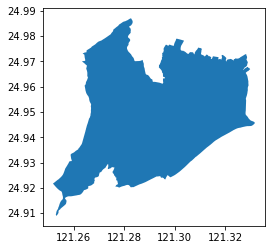

In [6]:
H08.plot()

In [7]:
import rasterio.mask
green_mid = sample.green.where(sample.pixel_qa == 322).median(dim="time")

/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


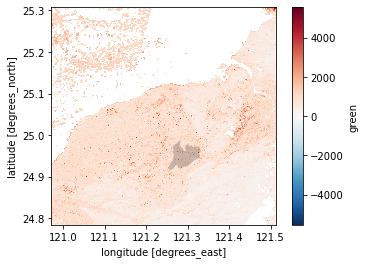

In [8]:
ax = H08.plot(alpha=0.2, color='black')
green_mid.plot(ax=ax,zorder=-1)

In [11]:
from shapely.geometry import Point, Polygon
import geopandas
cor = []
for i in green_mid.latitude.values:
    for j in green_mid.longitude.values:
        cor.append(Point(j,i))
pnts = geopandas.GeoDataFrame(geometry=cor)

In [12]:
r = []
a = pnts.geometry.values
for i in range(a.size):
    r.append(H08.contains(a[i]).values[0])

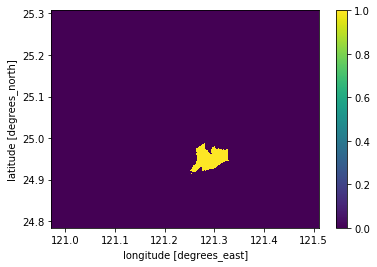

In [13]:
tes = np.array(r).reshape(green_mid.values.shape)
mask = xr.DataArray(tes, coords = green_mid.coords)
mask.plot()

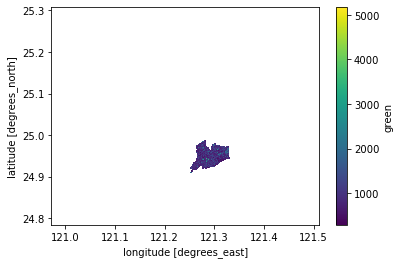

In [25]:
clip = green_mid.where(mask == True)
clip.plot()